# Matplotlib

## Introduction to Matplotlib

Matplotlib is one of the most widely used data visualization libraries in Python. It provides a wide array of tools for creating static, interactive, and animated visualizations in Python. Think of it as the foundation upon which many other plotting libraries are built.

Matplotlib's architecture is layered, which provides flexibility and different aspects of plot creation. It consists of three main layers:

### 1. Backend Layer
* Handles the low-level details of rendering plots to different output formats (e.g., PNG, SVG, PDF, interactive displays).
* **Key Components:**
    * **`FigureCanvas`:** Defines the area where the figure is drawn (think of it as the "canvas" or "page").
    * **`Renderer`:** Knows how to draw on the `FigureCanvas`. Different renderers handle different output formats.
    * **`Event`:** Handles user interactions like mouse clicks and keyboard presses (for interactive plots).
 * **Note:** Beginners rarely interact directly with the backend layer.

### 2. Artist Layer
* Provides a high-level, object oriented interface for creating and manipulating plot elements. Everything you see in a Matplotlib figure is an "Artist" object.
* **Types of Artist Objects:**
    * **Primitive artists:** Basic geometric shapes and text elements (e.g., `Line2D`, `Rectangle`, `Circle`, `Text`).
    * **Composite artists:** Collections of other Artist objects (e.g. `Axis`, `Tick`, `Axes`, `Figure`)
* **Key Concepts:**
    * **`Figure`:** The top-level container that holds all the elements of a plot.
    * **`Axes`:** Represents an individual plot within a figure. It contains the axis (x-axis, y-axis, and potentially a z-axis in 3D plots), the data, the labels, the title, etc. Most plotting commands are applied to an `Axes` object."
    * Composite artists can contain other composite artists and primitive artists. (e.g., A `Figure` can contain multiple `Axes`, and each `Axes` can contain `Line2D` objects, `Text` objects, etc.).
* **Note:** The artist layer is suitable for more advanced users and developers who need fine-grained control over their plots.

### 3. Scripting Layer (Pyplot)
* Provides a simpler, MATLAB-like interface for creating plots. It's the most commonly used layer for everyday data visualization tasks.
* **Key Component:** `matplotlib.pyplot` (often imported as `plt`)
* **How it Works:** `pyplot` automatically manages the creation of `Figure` and `Axes` objects behind the scenes, making it easier to quickly generate plots.

## Anatomy of a Figure
Understanding the different components of a Matplotlib plot is crucial:

![Anatomy of a Plot](assets/anatomy_of_a_plot.png)

## Plotting with Matplotlib

#### 1. Import Libraries

`matplotlib.pyplot` is the most commonly used module. It provides a MATLAB-like interface, making it easy to create plots quickly.

In [3]:
import matplotlib.pyplot as plt # Almost universally used conventional alias is plt

#### 2. Prepare Your Data

In [9]:
# Example: Creating Synthetic Data
import numpy as np

years = np.arange(1980, 2014)
immigrants = np.random.randint(2000, 10000, size=34)

#### 3. Create Figures and Axes

Often, you'll use NumPy arrays (`np.array`) or Pandas DataFrames/Series to hold the data you want to plot.

`fig, ax = plt.subplots()`: This is the recommended way to start. It gives you more control.
* `fig`: Think of this as the entire "window" or "canvas" where your plots will appear.
* `ax`: This is the _axes_ object. It represents the actual plotting area _within_ the figure. Most of your plotting commands will be called on the `ax` object (e.g., `ax.plot()`, `ax.scatter()`, etc.)



#### 4. Create the Plot

* `ax.plot(x, y)`: Creates a line plot. `x` and `y` are your data arrays.
* `ax.scatter(x, y)`: Creates a scatter plot.
* `ax.bar(x, height)`: Creates a bar plot.
* `ax.hist(data, bins=...)`: Creates a histogram. `bins` controls the number of bars.
* `ax.pie(data, labels=...)`: Creates a pir chart.

#### 5. Customize the Plot


* **Titles:**
    * `plt.title("Your title")`: Title for the whole figure.
    * `ax.set_title("Your title")`: Title for a specific axes object.
* **Axis Labels:**
    * `plt.xlabel("X-axis Label")"` / `plt.ylabel("Y-axis Label")`
    * `ax.set_xlabel("X-axis Label")"` / `ax.set_ylabel("Y-axis Label")`
* **Axis Limits:**
    * `plt.xlim(min, max)` / `plt.ylim(min, max)`
    * `ax.set_xlim(min, max)` / `ax.set_ylim(min, max)`
* **Grid Lines:**
    * `ax.grid(True)`
* **Legend:**
    * `ax.legend()`: Displays a legend, you'll often need to label your data within the plotting commands, eg., `ax.plot(x, y, label="Data Series 1")`
    * `loc` parameter sets the location of the legend.
* **Customization (Markers, colors, line styles):**
    * **Markers:** `marker=` ('o' for circle, 's' for square, '^' for triangle, etc.)
    * **Colors:** `'color'=` ('red', 'blue', '#FF0000', etc.)
    * **Line Styles:** `linestyle=` ('-' for solid, '--' for dashed, ':' for dotted, etc.)
    * **Marker Size:** For `ax.scatter()` use `s` for marker size. For `ax.plot`, use `markersize=`

#### 6. Display the Plot

* Use `plt.show()` to display the plot you've created.

### Multiple Plot in One Figure

* `plt.subplots(nrows, ncols, sharex=..., sharey=...)`
    * `nrows` and `ncols` define the layout. (e.g., `plt.subplots(2, 1)` creates two plots, one above the other)
    * `sharex=True` and `sharey=True` are useful when plots share the same axes scales.
    * Returns a figure and an _array_ of axes objects (e.g., `fig, axs = plt.subplots(2, 1)` => `axs[0]` is the first axes, `axs[1]` is the second). 
* `fig.add_subplot(nrows, ncols, index)`
    * Another way to add subplots. `index` specifies the position of the subplot (starting from 1). Less commonly used than `plt.subplots()`

### Example Code: Putting it Together

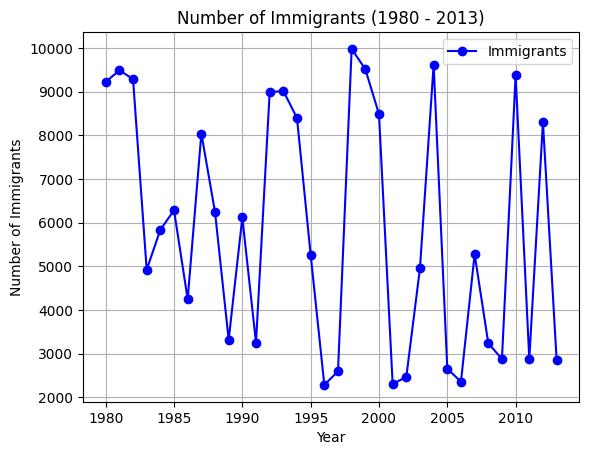

In [ ]:
# --- Single Plot ---

import matplotlib.pyplot as plt
import numpy as np

# Data
years = np.arange(1980, 2014)
immigrants = np.random.randint(2000, 10000, size=34)

# Create figues and axes
fig, ax = plt.subplots()

# Create a line plot
ax.plot(years, immigrants, marker='o', color='blue', linestyle='-', label='Immigrants')

# Customize
ax.set_title('Number of Immigrants (1980 - 2013)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')
ax.grid(True)
ax.legend()

# Show
plt.show()

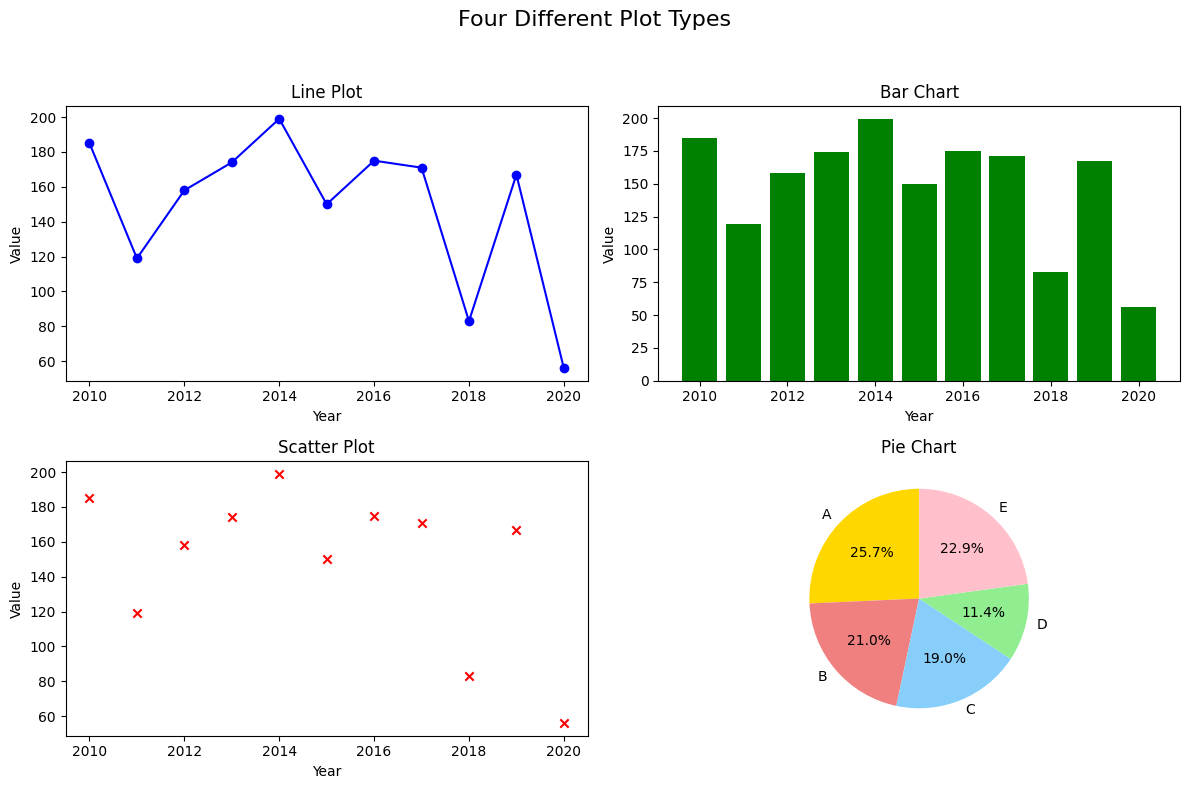

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
years = np.arange(2010, 2021)
values = np.random.randint(50, 200, size=len(years))
categories = ['A', 'B', 'C', 'D', 'E']
category_values = np.random.randint(10, 30, size=len(categories))

# Create the figure and subplots (NO shared axes for this layout)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Line Plot (top-left)
axs[0, 0].plot(years, values, marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Line Plot')
axs[0, 0].set_xlabel('Year')  # Add x-label to individual subplots
axs[0, 0].set_ylabel('Value') # Add y-label to individual subplots


# 2. Bar Chart (top-right)
axs[0, 1].bar(years, values, color='green')
axs[0, 1].set_title('Bar Chart')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Value')

# 3. Scatter Plot (bottom-left)
axs[1, 0].scatter(years, values, color='red', marker='x')
axs[1, 0].set_title('Scatter Plot')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')

# 4. Pie Chart (bottom-right)
axs[1, 1].pie(category_values, labels=categories, autopct='%1.1f%%', startangle=90,
               colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'])
axs[1, 1].set_title('Pie Chart')
axs[1, 1].set_aspect('equal', adjustable='box')

# Overall figure title
fig.suptitle('Four Different Plot Types', fontsize=16)

# Adjust layout (important!)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle

# Show the plot
plt.show()
